# Data Science Intern - Summer 2022 (Remote, US&Canada)
## Summer 2022 Data Science Intern Challenge

First of all, for this problem, since the dataset is relatively small, I used my more comfortable and convenient analysis environment, Python and Pandas.

In [1]:
import pandas as pd

We look at the basic parameters of this data set.

In [21]:
df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
print(df.shape)
df.head(5)

(5000, 7)


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


This dataset consists of 5,000 transaction records with 7 columns of data: order id, shop id, user id, order amount, total number of items traded, payment method, and logs created time.

In [23]:
df.isnull().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

There are no empty cells in this table.

In [4]:
df.order_amount.describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

We can statistically find that the average order amount for this 30-day window is indeed 3145.13, but the standard deviation is surprisingly large at 41,282.54, and the median order amount is 284, 25th percentile is 163, 75th percentile is 390, but the maximum is another order of magnitude at 704,000.

In [5]:
df.total_items.describe()

count    5000.00000
mean        8.78720
std       116.32032
min         1.00000
25%         1.00000
50%         2.00000
75%         3.00000
max      2000.00000
Name: total_items, dtype: float64

Then we count the number of sneakers sold per order for this 30-day window and we find the same problem, that 75% order buy 3 pairs of sneakers or below, but the average is 8.78, and the maximum is at 2000

In [6]:
df.total_items.value_counts()

2       1832
1       1830
3        941
4        293
5         77
2000      17
6          9
8          1
Name: total_items, dtype: int64

If we do a count of these 5000 sneaker orders, we will find 17 orders of 2000 pairs in bulk.

In [24]:
df[df['total_items']==2000]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


When we analyse these 17 separate bulk orders of 2,000 pairs of sneakers, we see that they were all sold by the same customer from shop id 42, and all had a transaction value of 704,000.

<AxesSubplot:xlabel='shop_id', ylabel='order amount(log)'>

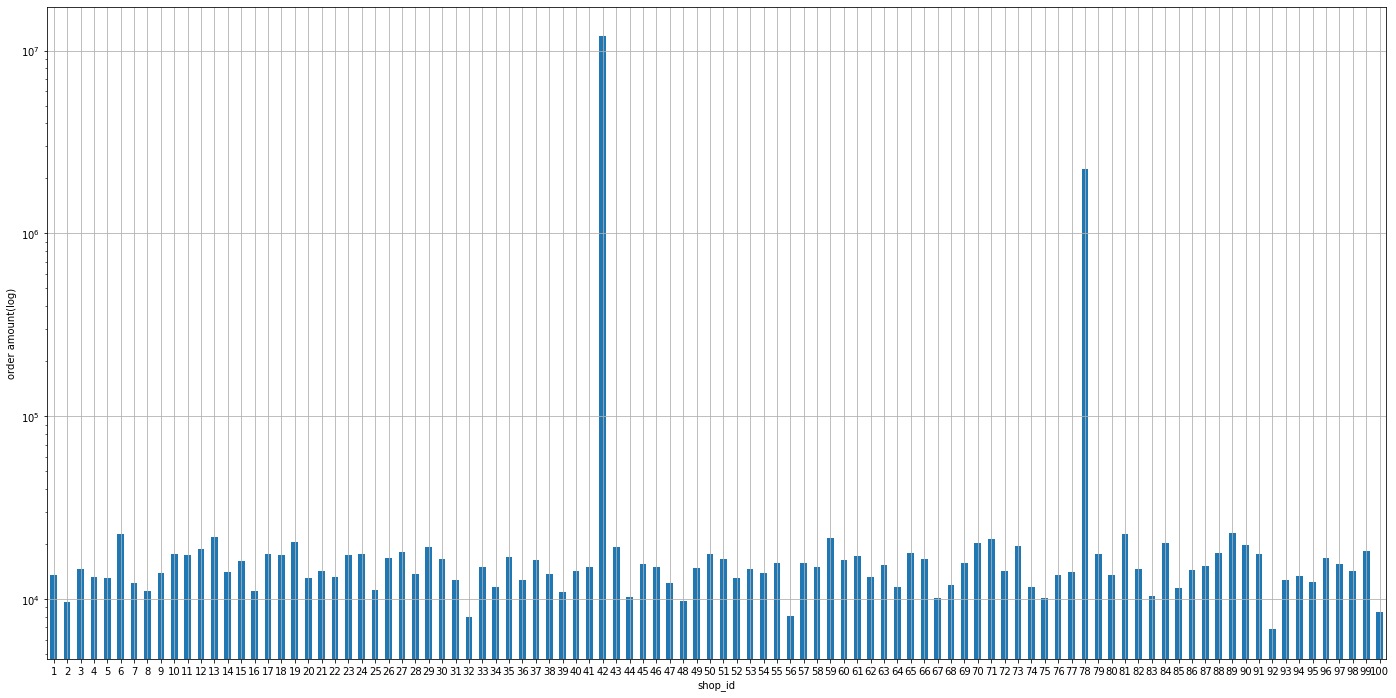

In [41]:
df.groupby('shop_id')['order_amount'].sum().plot(kind='bar', figsize=(24,12), 
                    logy=True, grid=True, rot=0, ylabel="order amount(log)")

When we sum up the turnover of these 100 shops, we find that apart from shop id 42 which stands out, shop id 78 is also far ahead of the other shops, we will analyse these two shops separately.

<AxesSubplot:xlabel='shop_id', ylabel='total items'>

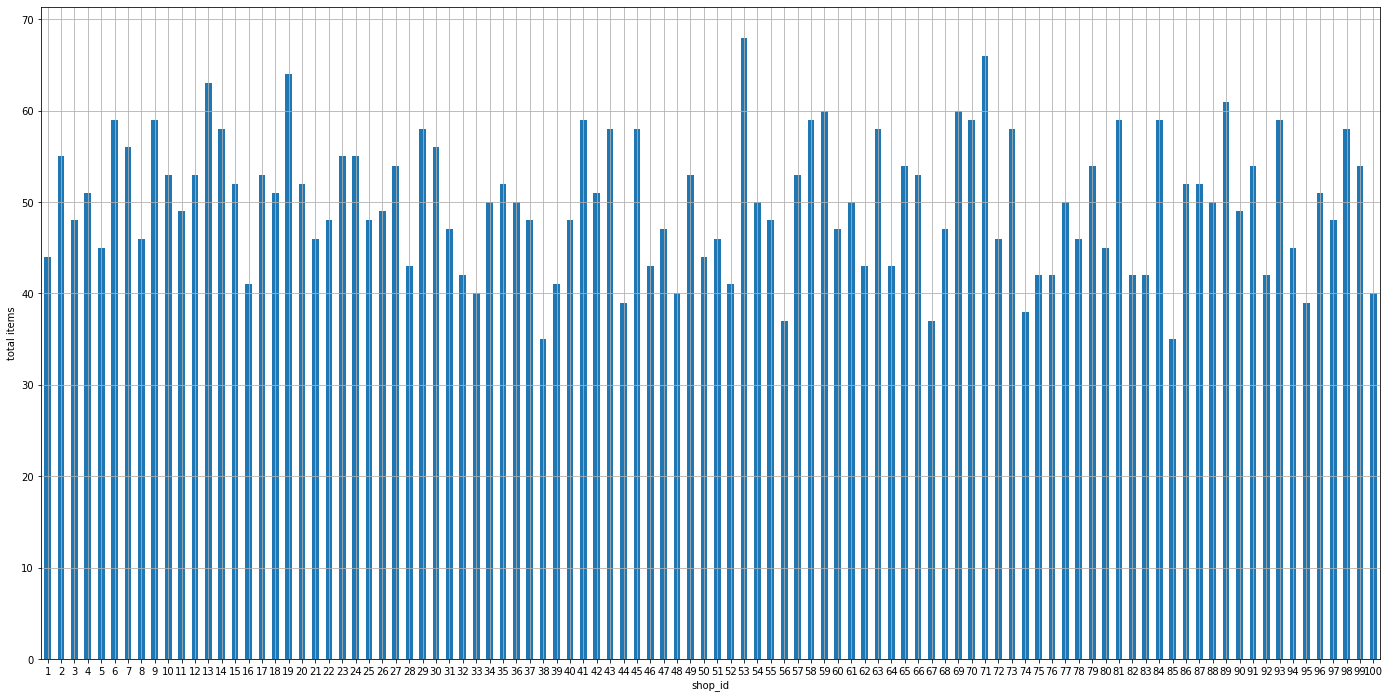

In [40]:
df.groupby('shop_id')['order_amount'].count().plot(kind='bar', figsize=(24,12), grid=True, rot=0, ylabel="total items")

In [42]:
df.groupby('shop_id')['order_amount'].count().describe()

count    100.000000
mean      50.000000
std        7.287737
min       35.000000
25%       44.750000
50%       50.000000
75%       55.000000
max       68.000000
Name: order_amount, dtype: float64

The data on the number of orders for these 100 shops during this 30-day window is normal, with a mean and median of 50 and a relatively small standard deviation.

<AxesSubplot:xlabel='shop_id', ylabel='price'>

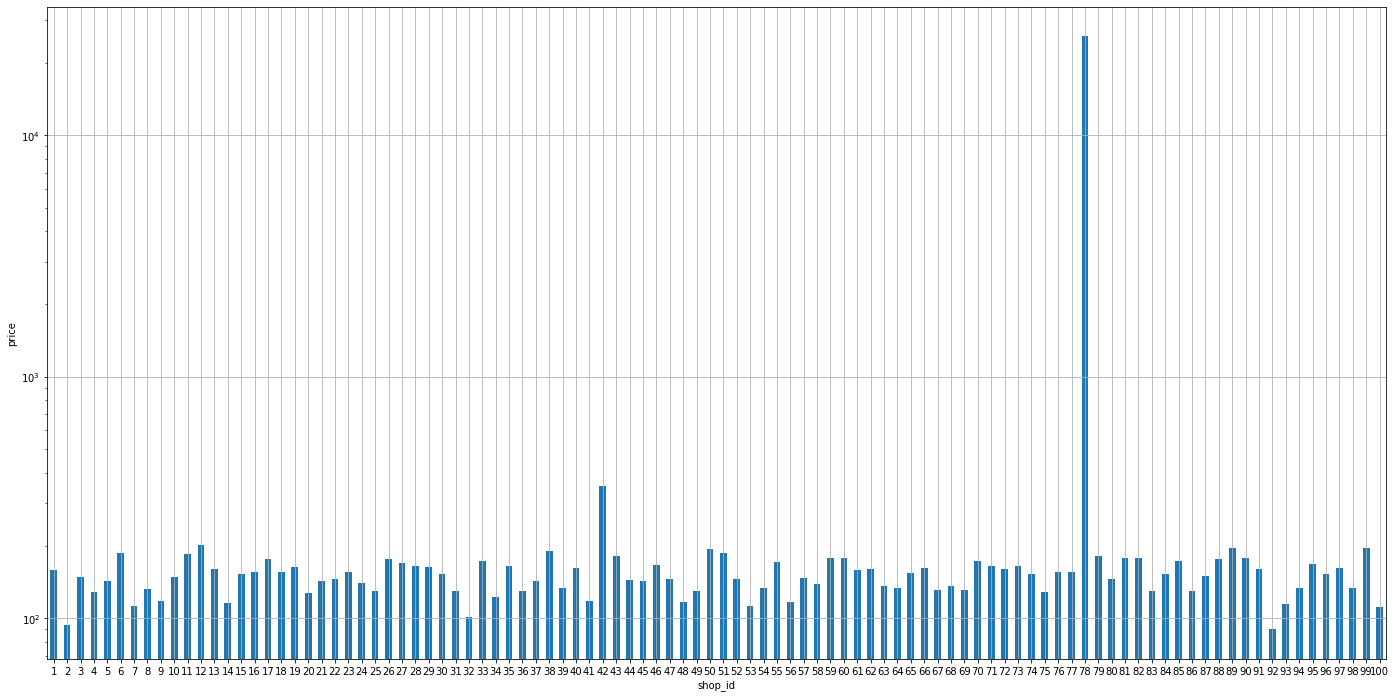

In [47]:
(df.groupby('shop_id')['order_amount'].sum()/df.groupby('shop_id')['total_items'].sum()).plot(kind='bar', figsize=(24,12), 
                    logy=True, grid=True, rot=0, ylabel="price")

Pricing varies per shop, but shop id 42 is higher than other shops and shop id 78 is much higher than other shops.

### Shop #42

In [8]:
df_42 = df[df['shop_id']==42]

<AxesSubplot:xlabel='order_id'>

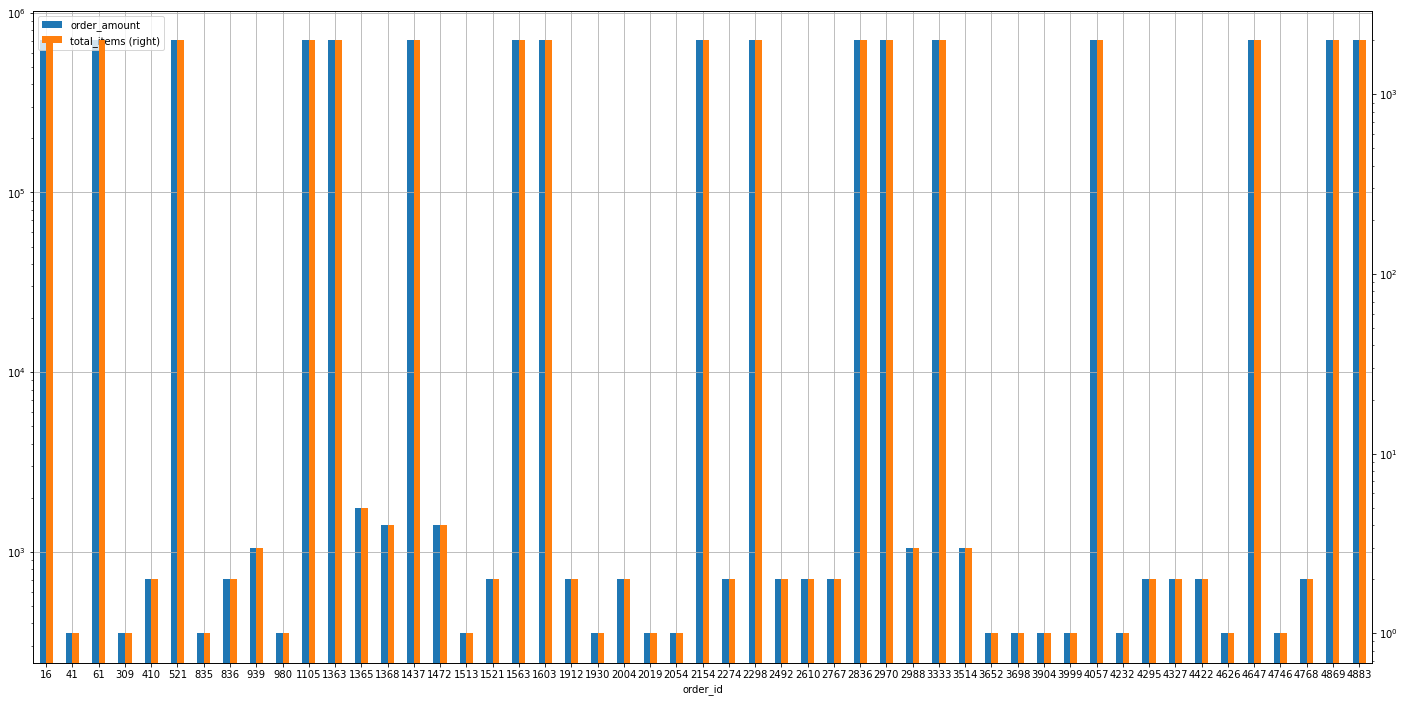

In [30]:
df_42.plot(x='order_id', y=['order_amount','total_items'], 
           kind='bar', logy=True, secondary_y='total_items', figsize=(24,12), grid=True, rot=0)

In [10]:
df_42.order_amount.value_counts()

704000    17
352       15
704       13
1056       3
1408       2
1760       1
Name: order_amount, dtype: int64

In [11]:
df_42.total_items.value_counts()

2000    17
1       15
2       13
3        3
4        2
5        1
Name: total_items, dtype: int64

Shop id 42, each pair of sneakers is priced at 352, but user id 607 will often buy 2,000 pairs of shoes at once.

### Shop #78

In [12]:
df_78 = df[df['shop_id']==78]

<AxesSubplot:xlabel='order_id'>

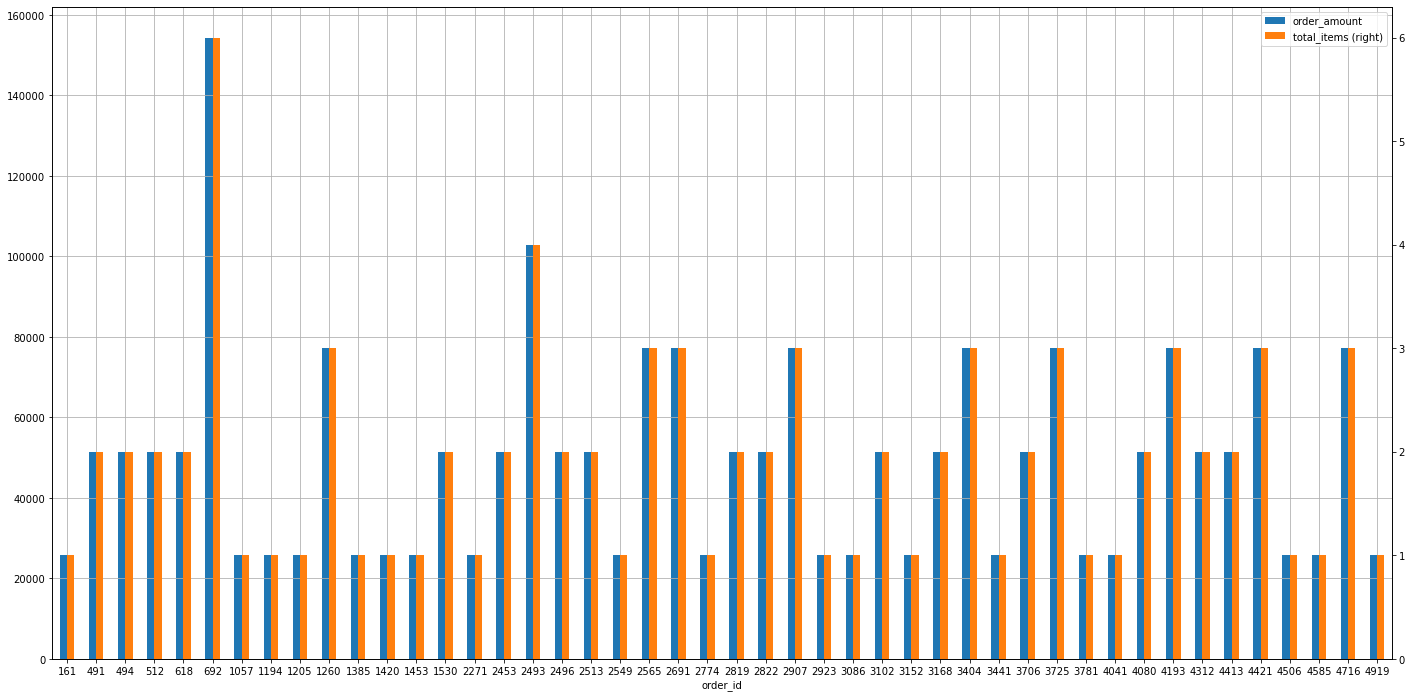

In [29]:
df_78.plot(x='order_id', y=['order_amount','total_items'], 
           kind='bar', secondary_y='total_items', figsize=(24,12), grid=True, rot=0)

In [35]:
(df_78.order_amount/df_78.total_items).value_counts()

25725.0    46
dtype: int64

In [37]:
df_78.total_items.value_counts()

1    19
2    16
3     9
6     1
4     1
Name: total_items, dtype: int64

Shop id 78, priced at $25,725 per pair of sneakers, a price that far exceeds other shops

### Other shops

Next we look at the business figures for the other 98 shops.

In [25]:
df_others = df[~df['shop_id'].isin([42, 78])]

In [17]:
df_others.order_amount.describe()

count    4903.000000
mean      300.155823
std       155.941112
min        90.000000
25%       163.000000
50%       284.000000
75%       386.500000
max      1086.000000
Name: order_amount, dtype: float64

The turnover figures after excluding those two shops are much more normal, with a mean of 300 and a standard deviation of 155.

In [18]:
df_others.total_items.describe()

count    4903.000000
mean        1.995717
std         0.982602
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         8.000000
Name: total_items, dtype: float64

Selling an average of two pairs per order.

In [34]:
(df_others.order_amount/df_others.total_items).describe()

count    4903.000000
mean      150.400163
std        23.851202
min        90.000000
25%       132.000000
50%       153.000000
75%       166.000000
max       201.000000
dtype: float64

The average sneakers unit price is 150, with a standard deviation of 23, with a low of 90 and a high of 201, which means that shop id 42 is also far more expensive than other shops.

<AxesSubplot:xlabel='shop_id', ylabel='price'>

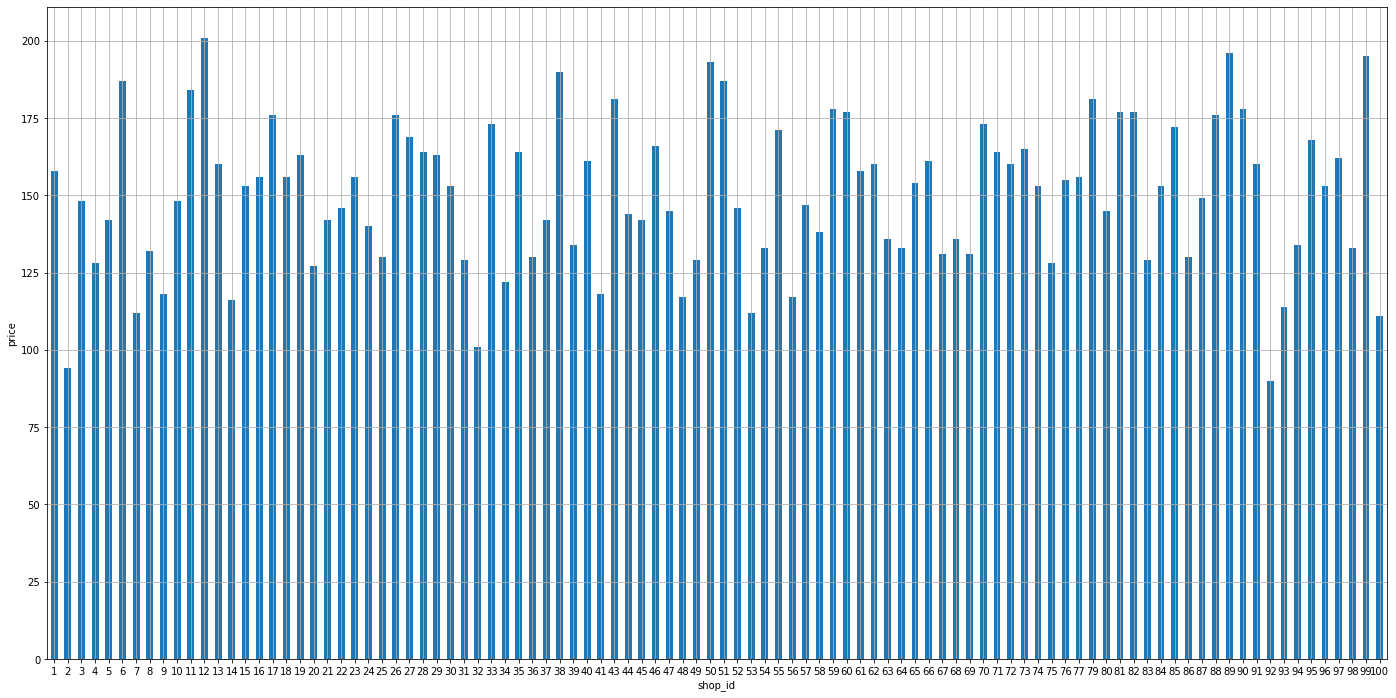

In [ ]:
(df_others.groupby('shop_id')['order_amount'].sum()/df_others.groupby('shop_id')['total_items'].sum()).plot(
    kind='bar', figsize=(24,12), grid=True, rot=0, ylabel="price")

Pricing varies from shop to shop, but is relatively normal.

## Conclusion 

### a)Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

The average order value (AOV) is simply the average of the orders, but in this case there are some extreme values that affect this average, so it is not representative of the general situation. shop id 42 and shop id 78 are both extreme cases. shop id 42 has a unit price of 352, which is more than twice as high as the average price of the other 98 shops. shop id 78 is priced at 25,725 per sneaker, either this is also an abnormal figure or the shop is on the high end of the scale, which is also not representative of the general situation.

### b)What metric would you report for this dataset?
If we count the general situation, we can choose to exclude these two shops and count the others. If we don't want to exclude these two shops, I think the median of the figures would be more representative.

### c)What is its value?


In [51]:
df.order_amount.describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

In [52]:
df_others.order_amount.describe()

count    4903.000000
mean      300.155823
std       155.941112
min        90.000000
25%       163.000000
50%       284.000000
75%       386.500000
max      1086.000000
Name: order_amount, dtype: float64

The median order value is 284, the 25th percentile is 163 and the 75th percentile is 390. the data above show that even in the extreme case of violent removal, these figures vary considerably and can be used as a reference for the general case.

## Question 2

### a. How many orders were shipped by Speedy Express in total?

```sql
SELECT COUNT(Orders.orderId) AS "Number of Orders"
FROM Orders, Shippers
WHERE ShipperName='Speedy Express'
AND Shippers.ShipperID=Orders.ShipperID
```
There were 54 orders shipped by Speedy Express.

### b. What is the last name of the employee with the most orders?

```sql
SELECT LastName, COUNT(Orders.EmployeeID)
FROM Employees
INNER JOIN Orders ON Orders.EmployeeID=Employees.EmployeeID
GROUP BY Orders.EmployeeID, LastName
Order by COUNT(Orders.EmployeeID) Desc;
```

The last name of this employee is Peacock.

### c. What product was ordered the most by customers in Germany?

```sql
SELECT Products.ProductName as ProductName, OrderDetails.Quantity
FROM (((Orders
INNER JOIN Customers ON Orders.CustomerID=Customers.CustomerID)
INNER JOIN OrderDetails ON Orders.OrderID=OrderDetails.OrderID)
INNER JOIN Products ON Products.ProductID=OrderDetails.ProductID)
WHERE Country = 'Germany'
Group By Products.ProductID, Products.ProductName, OrderDetails.Quantity
Order by OrderDetails.Quantity Desc
```

If we care about quantity ordered, Steeleye Stout were ordered 100 in quantity.

```sql
SELECT Products.ProductName, COUNT(Products.ProductName)
FROM (((Orders
INNER JOIN Customers ON Orders.CustomerID=Customers.CustomerID)
INNER JOIN OrderDetails ON Orders.OrderID=OrderDetails.OrderID)
INNER JOIN Products ON Products.ProductID=OrderDetails.ProductID)
WHERE Country = 'Germany'
GROUP BY Products.ProductID, Products.ProductName
Order by COUNT(Products.ProductID) Desc;
```
Gorgonzola Telino is ordered 5 times.